# Carregar dataset no colab


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()
data.printdir()

# Matriz de confusão


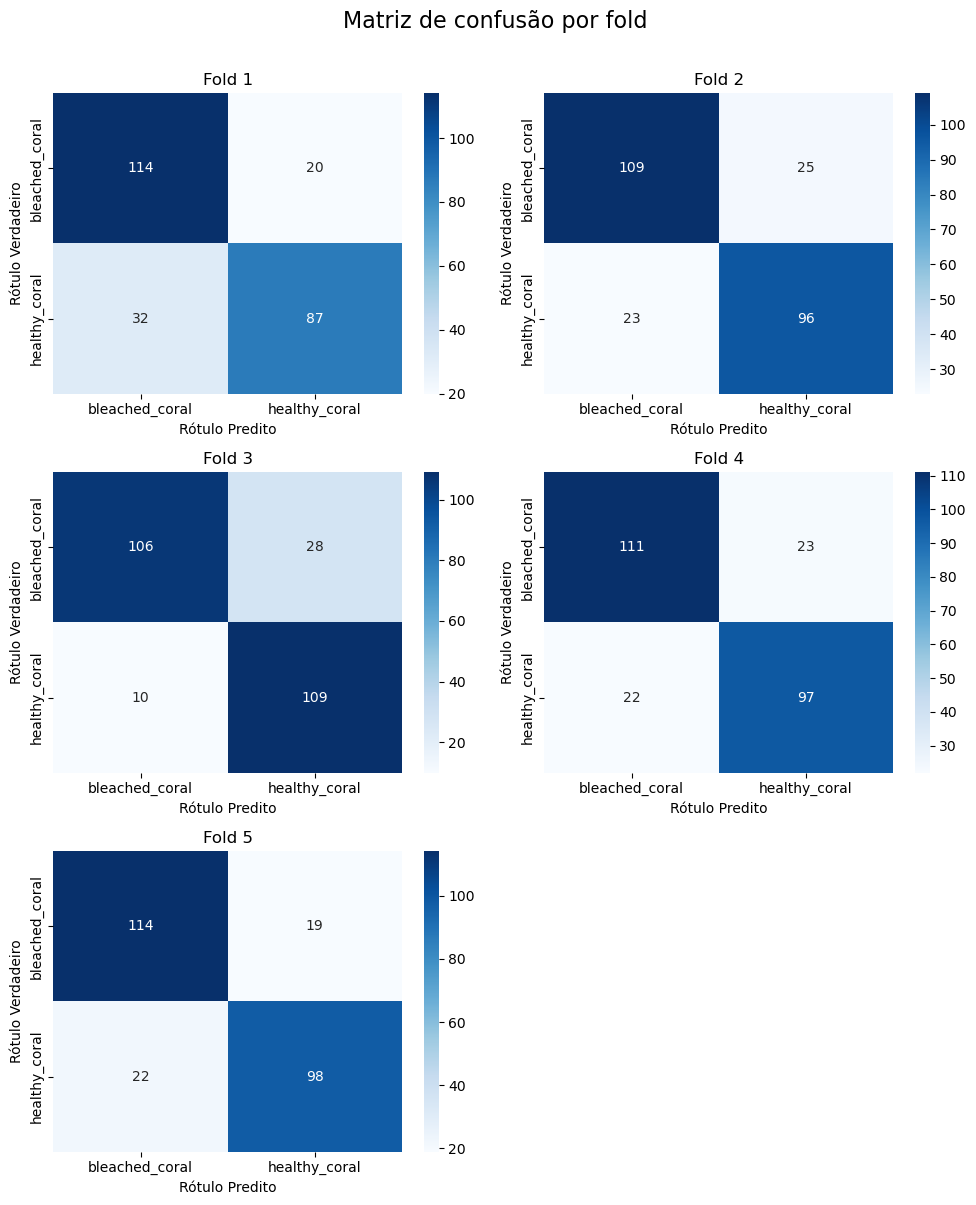

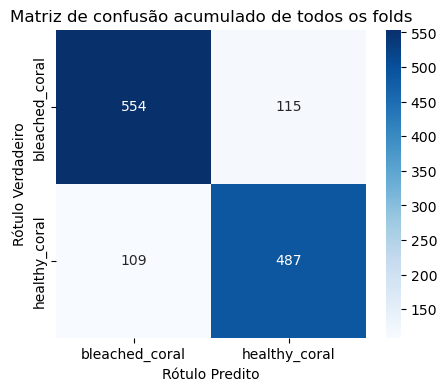

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- SEUS DADOS AQUI ---
# Substitua estes exemplos pelas matrizes de confusão reais de cada um dos seus folds.
# Certifique-se de que a ordem dos valores em cada matriz corresponde
# às classes que você definiu em 'class_names'.

# Exemplo de matrizes de confusão para 5 folds (2 classes: 0 e 1)
# Exemplo: [[Verdadeiro Negativo, Falso Positivo],
#           [Falso Negativo, Verdadeiro Positivo]]

# Suponha que você tem 5 folds e 2 classes (ex: 'Não Doença', 'Doença')
# cm_fold_1 = np.array([[80, 5],
#                       [10, 105]])

# cm_fold_2 = np.array([[85, 3],
#                       [8, 104]])

# cm_fold_3 = np.array([[78, 7],
#                       [12, 103]])

# cm_fold_4 = np.array([[82, 6],
#                       [9, 102]])

# cm_fold_5 = np.array([[75, 10],
#                       [15, 100]])

# # COLOQUE AS SUAS MATRIZES AQUI:
# Listas de arrays NumPy com as matrizes de confusão de cada fold
# (Substitua estes valores de exemplo pelos seus resultados reais)
confusion_matrices_per_fold = [
    np.array([[114, 20], [32, 87]]),  # Matriz do Fold 1
    np.array([[109, 25], [23, 96]]),   # Matriz do Fold 2
    np.array([[106, 28], [10, 109]]),  # Matriz do Fold 3
    np.array([[111, 23], [22, 97]]),   # Matriz do Fold 4
    np.array([[114, 19], [22, 98]])  # Matriz do Fold 5
]

# Defina os nomes das suas classes.
# Certifique-se de que corresponde à ordem das suas labels e à ordem das matrizes.
class_names = ['bleached_coral', 'healthy_coral'] # Exemplo: ajuste para 'Não Doença', 'Doença', etc.
# --- FIM DA SEÇÃO DE DADOS ---


# --- CÓDIGO DE VISUALIZAÇÃO (não precisa alterar, a menos que queira ajustar o layout) ---

n_splits = len(confusion_matrices_per_fold)
if n_splits == 0:
    print("Nenhuma matriz de confusão fornecida para plotar.")
else:
    # Inicializa a matriz de confusão total
    num_classes = len(class_names)
    total_cm = np.zeros((num_classes, num_classes))

    # Configura o layout da figura para os subplots dos folds
    # Ajuste 'n_cols' para controlar quantas matrizes por linha
    n_cols = 2 # Ex: 3 matrizes por linha
    n_rows = (n_splits + n_cols - 1) // n_cols # Calcula o número de linhas necessário

    # Tamanho da figura. Ajuste para caber bem na tela, especialmente com mais folds.
    # Cada subplot tem um tamanho base de aproximadamente 5x4 polegadas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

    # Transforma axes em um array 1D para fácil iteração, se necessário
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    elif n_rows == 1 and n_cols == 1:
        axes = [axes] # Garante que seja uma lista para a iteração

    for fold, cm in enumerate(confusion_matrices_per_fold):
        # Acumula a matriz de confusão para o gráfico total
        total_cm += cm

        ax = axes[fold] # Seleciona o subplot atual

        # Plota a matriz de confusão para o fold atual
        sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_xlabel('Rótulo Predito')
        ax.set_ylabel('Rótulo Verdadeiro')
        ax.set_title(f'Fold {fold+1}')

    # Oculta subplots vazios, se houver
    for i in range(n_splits, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta layout e reserva espaço para suptitle
    plt.suptitle('Matriz de confusão por fold', y=1.00, fontsize=16) # Título geral
    plt.show()

    # Gráfico de Confusão Acumulado de todos os folds (em uma nova figura)
    plt.figure(figsize=(5, 4)) # Tamanho ligeiramente menor para o gráfico único
    sns.heatmap(total_cm, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Rótulo Predito')
    plt.ylabel('Rótulo Verdadeiro')
    plt.title('Matriz de confusão acumulado de todos os folds')
    plt.show()